In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

1. import tensorflow as tf: Imports the TensorFlow library, which is widely   used for deep learning tasks.

2. from tensorflow.keras import layers, models: Imports Keras' layers module to build neural network layers, and models to create and manage the overall model architecture.

3. from tensorflow.keras.preprocessing.image import ImageDataGenerator: Imports a utility to augment and preprocess image data for training and validation.



!find dataset -type d -name ".ipynb_checkpoints" -exec rm -rf {} +


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = '/content/drive/MyDrive/dataset'

!find /content/drive/MyDrive/dataset -type d -name ".ipynb_checkpoints" -exec rm -rf {} +


In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128,128),
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128,128),
    class_mode='binary',
    subset='validation'
)

Found 337 images belonging to 2 classes.
Found 83 images belonging to 2 classes.


ImageDataGenerator:

1. rescale=1./255: Normalizes pixel values to the range [0, 1] by dividing by 255.

2. validation_split=0.2: Splits 20% of the data for validation.

train_generator:

1. Loads the training subset (80%) of images from the directory data_dir.

2. Images are resized to 128×128 pixels.

3. class_mode='binary': Indicates that this is a binary classification task.

validation_generator:

1. Loads the validation subset (20%) from the same directory with the same settings.

In [ ]:
print(train_generator.class_indices)


{'apples': 0, 'bananas': 1}


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(
    filters = 32,
    kernel_size = (3,3),
    padding='same',
    activation = 'relu',
    input_shape = (128,128,3)
))
model.add(layers.MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2)
))
# 2nd convolutional block
model.add(layers.Conv2D(
    filters = 64,
    kernel_size = (3,3),
    padding='same',
    activation='relu'
))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Flatten and Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Initialization:

1. models.Sequential(): Creates a linear stack of layers.

First Convolutional Block:

1. Conv2D: Applies 32 filters of size 3x3 with ReLU activation and same padding.

2. MaxPooling2D: Reduces the spatial size by taking the max over a 2x2 region.

Second Convolutional Block:

1. Another convolution layer with 64 filters followed by max pooling.

Flattening and Fully Connected Layers:

1. Flatten(): Converts 2D feature maps into a 1D feature vector.

2. Dense(64, activation='relu'): Fully connected layer with 64 neurons.

3. Dense(1, activation='sigmoid'): Output layer for binary classification (produces probability between 0 and 1).

Compilation:

1. optimizer='adam': Uses the Adam optimization algorithm.

2. loss='binary_crossentropy': Appropriate loss function for binary classification.

3. metrics=['accuracy']: Evaluates model performance using accuracy.

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,213,825 (16.07 MB)

 Trainable params: 4,213,825 (16.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.4725 - loss: 1.5077 - val_accuracy: 0.6145 - val_loss: 0.6237
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7216 - loss: 0.5417 - val_accuracy: 0.7952 - val_loss: 0.4969
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8692 - loss: 0.3112 - val_accuracy: 0.8193 - val_loss: 0.5258
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8934 - loss: 0.2527 - val_accuracy: 0.8193 - val_loss: 0.4724
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9046 - loss: 0.2718 - val_accuracy: 0.7952 - val_loss: 0.4899
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8980 - loss: 0.2309 - val_accuracy: 0.7711 - val_loss: 0.5186
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9285 - loss: 0.1692 - val_accuracy: 0.7831 - val_loss: 0.5250
Epoch 8/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9606 - loss: 0.1269 - val_accuracy: 0.8313 - val_loss:

model.fit(...): Trains the model.

1. train_generator: The training dataset with augmented and normalized images.

2. epochs=15: The model will iterate over the entire training dataset 15 times.

3. validation_data=validation_generator: Evaluates the model on the validation set after each epoch to monitor performance.

In [ ]:
model.save("apple_banana_classifier.h5")


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("apple_banana_classifier.h5")

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

This function allows you to capture a photo using your webcam directly within Google Colab and save it as an image file.

<IPython.core.display.Javascript object>

Saved to photo.jpg


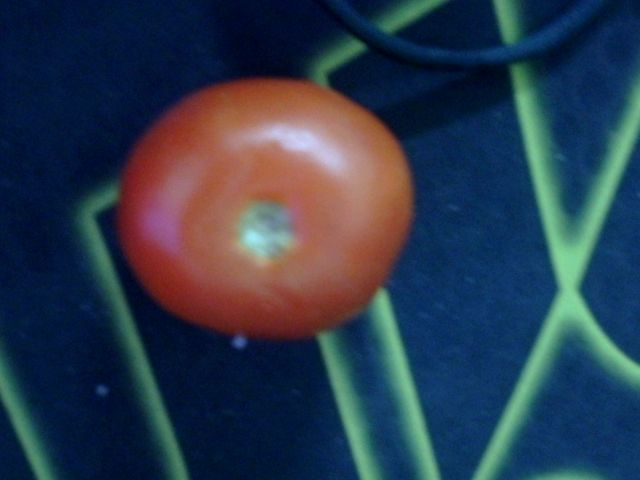

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

This code block captures an image using the previously defined take_photo() function, saves it, and displays it inside the Google Colab notebook. It also handles errors gracefully if webcam access is denied or unavailable.


(480, 640, 3)


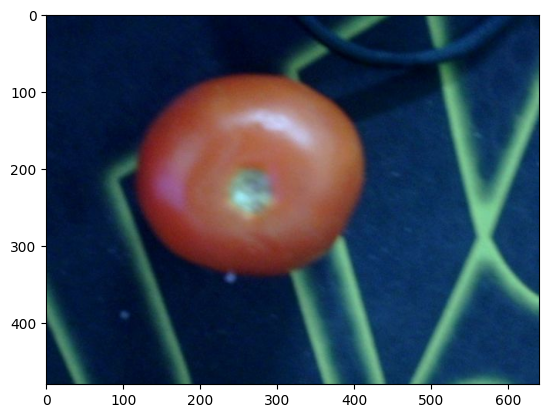

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('photo.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)
plt.show()

import cv2, numpy, matplotlib.pyplot
Imports OpenCV for image processing, NumPy for array operations, and Matplotlib for displaying the image.

1. cv2.imread('photo.jpg') - Reads the image file photo.jpg in BGR format (default for OpenCV).

2. cv2.cvtColor(img, cv2.COLOR_BGR2RGB) - Converts the image from BGR (OpenCV format) to RGB (Matplotlib-compatible).

3. print(img.shape) - Outputs the dimensions of the image (height, width, channels).

4. plt.imshow(img) + plt.show() - Displays the RGB image inline in the notebook.

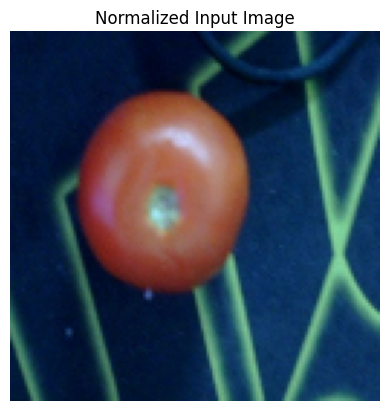

In [ ]:
img_resized = cv2.resize(img, (128, 128))
img_normalized = img_resized / 255.0

img_input = np.expand_dims(img_normalized, axis=0)
plt.imshow(img_input[0])  # Remove the batch dimension
plt.axis('off')
plt.title("Normalized Input Image")
plt.show()


1. cv2.resize(img, (128, 128)) - Resizes the image to 128×128 pixels to match the model’s input shape.

2. img_resized / 255.0 - Normalizes pixel values from [0, 255] to [0, 1] — a common preprocessing step for neural networks.

3. np.expand_dims(img_normalized, axis=0) - Adds a batch dimension to make the shape (1, 128, 128, 3), required for model input.

4. plt.imshow(img_input[0]) - Displays the normalized image (removes batch dimension before plotting).

5. plt.axis('off') & plt.title(...) - Cleans up the plot by hiding axes and adding a title.

In [ ]:
prediction = model.predict(img_input)

print("Raw prediction:", prediction)
if prediction[0][0] > 0.5:
    print("It's a banana!")
else:
    print("It's an apple!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Raw prediction: [[0.08834725]]
It's an apple!


This code uses the trained CNN model to predict whether the input image is an apple or a banana, based on the preprocessed image.